In [2]:
%matplotlib inline
import astropy.io.fits as pyfits
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import subprocess as sp
import scipy.ndimage as sci_nd
import glob
import matplotlib.pyplot as mpl
from astropy.table import Table, hstack, join
import sys
import os
from astropy.io import ascii
from astropy.table import Column
import urllib
import csv

In [5]:
def read_results_file(fname):
    r""" Reads a galfit HDU cube to get the results for the best fit model,
    which are stored in the header of the cube extension 2. It is assumed that
    a single sersic model was fit.
    Parameters
    ----------
    fname : str
        The name of the result file to read the model parameters from.
    Returns
    -------
    xc : str
        The model X center and its error (separated by whitespace)
    yc : str
        The model Y center and its error (separated by whitespace)
    M : str
        The model magnitude and its error (separated by whitespace)
    R : str
        The model effective radius and its error (separated by whitespace)
    N : str
        The model sersic index and its error (separated by whitespace)
    Q : str
        The model axis ratio and its error (separated by whitespace)
    T : str
        The model position angle and its error (separated by whitespace)
    chi : str
        The reduced chi square value of the fit
    F : str
        A galfit flag indicating the final status of the fit. If 0 everything
        is ok. If 1 it means that GALFIT finished 100 iterations without
        converging. If 2, it means GALFIT results diverged and they cannot
        be trusted,
    References
    ----------
    Examples
    --------
    """
    try:
        hdu=pyfits.open(fname)
        chi=hdu[2].header['CHI2NU']
        xc=hdu[2].header['1_XC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        yc=hdu[2].header['1_YC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        M=hdu[2].header['1_MAG'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        R=hdu[2].header['1_RE'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        N=hdu[2].header['1_N'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        Q=hdu[2].header['1_AR'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        T=hdu[2].header['1_PA'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        F= hdu[2].header['FLAGS'].replace(' ',',')
        if ('1' in F.split(',')):
            F=1
        elif ('2' in F.split(',')):
            F=2
        else:
            F=0
    except IOError:
        xc,yc,M,R,N,Q,T,chi,F="-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99","-99"
    return xc,yc,M,R,N,Q,T,chi,F

In [6]:
masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
#masterdata = ascii.read('/data1/rowland/mastertable')
masterdata_wkabooms = ascii.read('/data1/rowland/mastertable_wkabooms')
#masterdata['NUMBER_F850']

# START OF MASTERTABLE W/ KABOOMS

In [6]:
#KEEP - 1 of 4
#gets which galfit runs went kaboom

filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

kaboomis = []
kaboomfs = []
totalrealkaboomn =[]
totalrealkaboomf =[]
#testkaboom =[]
totalgalfitruns = []
totalkaboomN = []
totalkaboomF = []

for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    for num in detect_nums:
            totalgalfitruns.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/output{}.fits'.format(filter,num))
            #xc,yc,M,R,N,Q,T,chi,F = read_results_file('/data1/rowland/{}W/Outputs/output{}.fits'.format(filter,num))

            if F ==2:
                print(num,filter,'has suspected numerical converence error in current solution')
                totalkaboomN.append(num)
                totalkaboomF.append(filter)
                kaboomfs.append(filter)
                kaboomis.append(num)
                #testkaboom.append(({filter},num))
            #elif F == 0: #good runs
             #   print(num,filter)
            elif F == "-99":
                print(num,filter, 'went Kaboom')
                totalkaboomN.append(num)
                totalkaboomF.append(filter)
                totalrealkaboomn.append(num)
                totalrealkaboomf.append(filter)
            elif F ==1:
                print(num,filter,'error of ususally max #of iterations reached, but sometimes header/psf/image missing')
            else:
                continue
print(np.shape(kaboomis),'errors, plus',np.shape(totalrealkaboomn),'kabooms, out of ',np.shape(totalgalfitruns),'galfit runs of individual detections')
print(np.shape(totalkaboomN),np.shape(totalkaboomF)) #check this!!!!!!

1 F105W has suspected numerical converence error in current solution
4 F105W has suspected numerical converence error in current solution
5 F105W has suspected numerical converence error in current solution
6 F105W has suspected numerical converence error in current solution
7 F105W has suspected numerical converence error in current solution
8 F105W has suspected numerical converence error in current solution
9 F105W has suspected numerical converence error in current solution
10 F105W has suspected numerical converence error in current solution
12 F105W has suspected numerical converence error in current solution
14 F105W has suspected numerical converence error in current solution
15 F105W has suspected numerical converence error in current solution
16 F105W has suspected numerical converence error in current solution
19 F105W has suspected numerical converence error in current solution
20 F105W has suspected numerical converence error in current solution
21 F105W has suspected nume

33 F625W has suspected numerical converence error in current solution
40 F625W went Kaboom
42 F625W has suspected numerical converence error in current solution
45 F625W has suspected numerical converence error in current solution
46 F625W went Kaboom
49 F625W has suspected numerical converence error in current solution
50 F625W has suspected numerical converence error in current solution
53 F625W has suspected numerical converence error in current solution
54 F625W has suspected numerical converence error in current solution
55 F625W has suspected numerical converence error in current solution
62 F625W has suspected numerical converence error in current solution
67 F625W has suspected numerical converence error in current solution
68 F625W has suspected numerical converence error in current solution
70 F625W has suspected numerical converence error in current solution
73 F625W has suspected numerical converence error in current solution
1 F775W has suspected numerical converence error

In [7]:
#KEEP 2 of 4


realkb = Table([totalkaboomN,totalkaboomF], names=('detection_number', 'filter'))
T105kb = realkb[np.where(realkb['filter']==filters[0])]
T125kb = realkb[np.where(realkb['filter']==filters[1])]
T140kb = realkb[np.where(realkb['filter']==filters[2])]
T160kb = realkb[np.where(realkb['filter']==filters[3])]
T435kb = realkb[np.where(realkb['filter']==filters[4])]
T606kb = realkb[np.where(realkb['filter']==filters[5])]
T625kb = realkb[np.where(realkb['filter']==filters[6])]
T775kb = realkb[np.where(realkb['filter']==filters[7])]
T814kb = realkb[np.where(realkb['filter']==filters[8])]
T850Lkb = realkb[np.where(realkb['filter']==filters[9])]
mytableskb = [T105kb,T125kb,T140kb,T160kb,T435kb,T606kb,T625kb,T775kb,T814kb,T850Lkb]

In [8]:
#KEEP -3 of 4
#doing all below in one cycle--WORKS

masks=[]
allfilters=[]
mastermatch = []
idx=[]

#matches kaboom index (in detection order) with masterdata index (that includes masked nondetections)
for i,f in enumerate(filters):
    if f == 'F850LP':
        fn = f[:-2]
        tn = f[1:-2]
    else:
        fn = f[:-1]
        tn = f[1:-1]
    arr1 = (np.where(masterdata['NUMBER_{}'.format(fn)] > 0)[0])
    
#need to add in here but keep flags...maybe not bc will need to rerun all regardless of F=2 or ='-99' 
#didnt keep flags just did all b/c need to rerun both flags
    arr2 = mytableskb[i]['detection_number'].astype('int')
    newarr = np.zeros(len(arr1))
    newarr[:] = np.nan
    newarr[arr2] = arr1[arr2]
    masks.append(newarr)
for mask in masks:
    eachfilter = mask[~np.isnan(mask)]
    allfilters.append(eachfilter)
for i in allfilters:
    arr3 = np.arange(0,len(masterdata),1) 
    arr4 = i.astype('int')
    newerarr = np.zeros(len(arr3))
    newerarr[:] = np.nan
    newerarr[arr4] = arr3[arr4]
    mastermatch.append(newerarr)
    
#gets index when there was never a z match per filter
for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
        idx.append(indices)
    else:
        tfilter = filter[:-1]
        indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
        idx.append(indices)
            
#creates 0 & 1 table of galfit runs for kaboom or not
mastermatch = np.array(mastermatch)
print('shape:',np.shape(mastermatch))
mastermatch[np.where(mastermatch>=0.0)]=1 #1 means had a kaboom
mastermatch[np.where(mastermatch!=1.)]=0 #0 means no kaboom

#makes nongalfit runs into nan values
for i,master in enumerate(mastermatch):
    master[idx[i]]=np.nan

    
#add diff flag here, except will mess up sums, so idk...maybe later if theres a benefit b/c gotta rerun regardless
    
    
#gets total num of kabooms per detection, another column to add
sums = np.nansum(mastermatch,axis=0).astype('int') 

shape: (10, 89)


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater_equal


In [9]:
masterkabooms = Table([masterdata['recno'],mastermatch[0],mastermatch[1],mastermatch[2],mastermatch[3],mastermatch[4],\
                       mastermatch[5],mastermatch[6],mastermatch[7],mastermatch[8],mastermatch[9],\
                      sums],names=("recno","F105_kabooms","F125_kabooms","F140_kabooms","F160_kabooms","F435_kabooms","F606_kabooms","F625_kabooms","F775_kabooms","F814_kabooms","F850_kabooms","KaboomTotals"))
print('1=kaboom;    0=good first run;    nan=never ran bc no z match')
masterkabooms


1=kaboom;    0=good first run;    nan=never ran bc no z match


In [8]:
len(masterkabooms[np.where(masterkabooms['KaboomTotals']==0.0)]) 
#number of galaxies with no kabooms but idk how many had detections to begin with

19

In [6]:
#merge kabooms with masterdata
masterdata_wkabooms = join(masterdata,masterkabooms, keys='recno')
#ascii.write(masterdata_wkabooms,'/data1/rowland/mastertable_wkabooms') #already written
masterdata_wkabooms[83]

ACT-CL,SMH,RAJ2000,DEJ2000,imag,z,e_z,rcc,MSF,Simbad,recno,NUMBER_F105,MAG_AUTO_F105,MAGERR_AUTO_F105,KRON_RADIUS_F105,ISOAREA_IMAGE_F105,XPEAK_IMAGE_F105,YPEAK_IMAGE_F105,X_IMAGE_F105,Y_IMAGE_F105,ALPHA_J2000_F105,DELTA_J2000_F105,A_IMAGE_F105,THETA_IMAGE_F105,MU_MAX_F105,ELLIPTICITY_F105,CLASS_STAR_F105,FLUX_RADIUS_F105,Separation_1,NUMBER_F125,MAG_AUTO_F125,MAGERR_AUTO_F125,KRON_RADIUS_F125,ISOAREA_IMAGE_F125,XPEAK_IMAGE_F125,YPEAK_IMAGE_F125,X_IMAGE_F125,Y_IMAGE_F125,ALPHA_J2000_F125,DELTA_J2000_F125,A_IMAGE_F125,THETA_IMAGE_F125,MU_MAX_F125,ELLIPTICITY_F125,CLASS_STAR_F125,FLUX_RADIUS_F125,Separation_1a,NUMBER_F140,MAG_AUTO_F140,MAGERR_AUTO_F140,KRON_RADIUS_F140,ISOAREA_IMAGE_F140,XPEAK_IMAGE_F140,YPEAK_IMAGE_F140,X_IMAGE_F140,Y_IMAGE_F140,ALPHA_J2000_F140,DELTA_J2000_F140,A_IMAGE_F140,THETA_IMAGE_F140,MU_MAX_F140,ELLIPTICITY_F140,CLASS_STAR_F140,FLUX_RADIUS_F140,Separation_1b,NUMBER_F160,MAG_AUTO_F160,MAGERR_AUTO_F160,KRON_RADIUS_F160,ISOAREA_IMAGE_F160,XPEAK_IMAGE_F160,YPEAK_IMAGE_F160,X_IMAGE_F160,Y_IMAGE_F160,ALPHA_J2000_F160,DELTA_J2000_F160,A_IMAGE_F160,THETA_IMAGE_F160,MU_MAX_F160,ELLIPTICITY_F160,CLASS_STAR_F160,FLUX_RADIUS_F160,Separation_1c,NUMBER_F435,MAG_AUTO_F435,MAGERR_AUTO_F435,KRON_RADIUS_F435,ISOAREA_IMAGE_F435,XPEAK_IMAGE_F435,YPEAK_IMAGE_F435,X_IMAGE_F435,Y_IMAGE_F435,ALPHA_J2000_F435,DELTA_J2000_F435,A_IMAGE_F435,THETA_IMAGE_F435,MU_MAX_F435,ELLIPTICITY_F435,CLASS_STAR_F435,FLUX_RADIUS_F435,Separation_1d,NUMBER_F606,MAG_AUTO_F606,MAGERR_AUTO_F606,KRON_RADIUS_F606,ISOAREA_IMAGE_F606,XPEAK_IMAGE_F606,YPEAK_IMAGE_F606,X_IMAGE_F606,Y_IMAGE_F606,ALPHA_J2000_F606,DELTA_J2000_F606,A_IMAGE_F606,THETA_IMAGE_F606,MU_MAX_F606,ELLIPTICITY_F606,CLASS_STAR_F606,FLUX_RADIUS_F606,Separation_1e,NUMBER_F625,MAG_AUTO_F625,MAGERR_AUTO_F625,KRON_RADIUS_F625,ISOAREA_IMAGE_F625,XPEAK_IMAGE_F625,YPEAK_IMAGE_F625,X_IMAGE_F625,Y_IMAGE_F625,ALPHA_J2000_F625,DELTA_J2000_F625,A_IMAGE_F625,THETA_IMAGE_F625,MU_MAX_F625,ELLIPTICITY_F625,CLASS_STAR_F625,FLUX_RADIUS_F625,Separation_1f,NUMBER_F775,MAG_AUTO_F775,MAGERR_AUTO_F775,KRON_RADIUS_F775,ISOAREA_IMAGE_F775,XPEAK_IMAGE_F775,YPEAK_IMAGE_F775,X_IMAGE_F775,Y_IMAGE_F775,ALPHA_J2000_F775,DELTA_J2000_F775,A_IMAGE_F775,THETA_IMAGE_F775,MU_MAX_F775,ELLIPTICITY_F775,CLASS_STAR_F775,FLUX_RADIUS_F775,Separation_1g,NUMBER_F814,MAG_AUTO_F814,MAGERR_AUTO_F814,KRON_RADIUS_F814,ISOAREA_IMAGE_F814,XPEAK_IMAGE_F814,YPEAK_IMAGE_F814,X_IMAGE_F814,Y_IMAGE_F814,ALPHA_J2000_F814,DELTA_J2000_F814,A_IMAGE_F814,THETA_IMAGE_F814,MU_MAX_F814,ELLIPTICITY_F814,CLASS_STAR_F814,FLUX_RADIUS_F814,Separation_1h,NUMBER_F850,MAG_AUTO_F850,MAGERR_AUTO_F850,KRON_RADIUS_F850,ISOAREA_IMAGE_F850,XPEAK_IMAGE_F850,YPEAK_IMAGE_F850,X_IMAGE_F850,Y_IMAGE_F850,ALPHA_J2000_F850,DELTA_J2000_F850,A_IMAGE_F850,THETA_IMAGE_F850,MU_MAX_F850,ELLIPTICITY_F850,CLASS_STAR_F850,FLUX_RADIUS_F850,Separation,F105_kabooms,F125_kabooms,F140_kabooms,F160_kabooms,F435_kabooms,F606_kabooms,F625_kabooms,F775_kabooms,F814_kabooms,F850_kabooms,KaboomTotals
str10,str18,float64,float64,float64,float64,float64,float64,str16,str6,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64

# END OF MASTERTABLE W/ KABOOMS

# Rerunning Kaboom detections with amended params

## Amending galfit input files params & names

In [10]:
#Bruno's github codes

def get_fixpars_default():
    r""" Returns the default dictionary containing the information on whether
    or not to fix any parameter of the fit. By default, all parameters are
    not fixed.
    Parameters
    ----------
    Returns
    -------
    fixpars : dict
        A dictionary for each of the sersic parameters setting the fix/free key.
    References
    ----------
    Examples
    --------
    """
    return {'x':1,'y':1,'m':1,'re':1,'n':1,'q':1,'pa':1,'sky':1} #AMENDED HERE TO ALLOW n TO VARY


def write_object(model,x,y,m,re,n,ba,pa,num,fixpars=None):
    r""" Returns a string object containing a general description for a galaxy
    profile model in GALFIT, with the input parameters as first guesses.
    Parameters
    ----------
    model : str
    Returns
    -------
    References
    ----------
    Examples
    --------
    """
    if fixpars is None:
        fixpars=get_fixpars_default()

    objString = ""
    objString += "#Object number: %i\n"%(num)
    objString += " 0) %s             # Object type\n"%(model)
    objString += " 1) %6.4f %6.4f  %i %i    # position x, y        [pixel]\n"%(x,y,fixpars['x'],fixpars['y'])
    objString += " 3) %4.4f      %i       # total magnitude\n"%(m,fixpars['m'])
    objString += " 4) %4.4f       %i       #     R_e              [Pixels]\n"%(re,fixpars['re'])
    objString += " 5) %4.4f       %i       # Sersic exponent (deVauc=4, expdisk=1)\n"%(n,fixpars['n'])
    objString += " 9) %4.4f       %i       # axis ratio (b/a)   \n"%(ba,fixpars['q'])
    objString += "10) %4.4f       %i       # position angle (PA)  [Degrees: Up=0, Left=90]\n"%(pa,fixpars['pa'])
    objString += " Z) 0                  #  Skip this model in output image?  (yes=1, no=0)\n"
    objString += " \n"
    return objString


def input_file(f,modelsString,magzpt,sky,x_range,y_range,sconvbox,pixscale,imgname='input.fits',outname="output.fits",psfname='none',maskname="none",signame='none',fixpars=None, constraintname='none'):
    r""" Writes an input galfit file with the provided parameters.
    Parameters
    ----------
    f : file pointer
        Python file pointer to be written
    modelsString : str
        A single string containing the starting parameters of the models to be
        used. Model strings can be generated by the write_object function.
    magzpt : float
        Magnitude zeropoint of the image data. Needed for correct model
        magnitudes.
    sky : float
        Initial value for sky background (assumed to be constant)
    x_range : tuple, int
        X-axis boundaries to be used in image fitting (useful to fit a subset
        of a larger image).
    y_range : tuple, int
        Same as z_range, but for y-axis boundaries.
    sconvbox : int
        Size of the convolution box to be applied to the model image (should be
        at least the size of the PSF image).
    pixscale : float
        Pixel scale (in arcsecond/pixel) of the input image data
    imgname : str, optional
        Name of the image with the input data (default - input.fits)
    outname : str, optional
        Name of the output image block to be created by GALFIT
        (default - output.fits)
    psfname : str, optional
        Name of the psf fits file, to be used for model convolution
        (default - none, no psf used)
    maskname : str, optional
        Name of the mask file to be used in the fit. It mask bad pixel values
        and others (e.g. neighbor objects) that are ignored by the fitting
        algorithm (default - none, no mask used).
    signame : str, optional
        Error image corresponding to the input data.
        (default - none, sigma image created internally).
    fixpars : dict
        Dictionary which controls if parameters are fixed or not for the fit.
        This is used here to control wether the sky background is fixed or a
        free parameter for the fit.
    Returns
    -------
        None
        It writes to the file "f" and returns nothing.
    References
    ----------
    Examples
    --------
    """
    if fixpars is None:
        fixpars=get_fixpars_default()

    assert len(x_range)==len(y_range)==2,"x_range,y_range must have two elements"
    assert x_range[1]>x_range[0],"x_range must be sorted in ascendent order"
    assert y_range[1]>y_range[0],"y_range must be sorted in ascendent order"

    f.write("================================================================================\n")
    f.write("# IMAGE and GALFIT CONTROL PARAMETERS\n")
    f.write("A) %s         # Input data image (FITS file)\n"%imgname)
    f.write("B) %s        # Output data image block\n"%outname)
    f.write("C) %s                # Sigma image name (made from data if blank or 'none' \n"%signame)
    f.write("D) %s         # Input PSF image and (optional) diffusion kernel\n"%psfname)
    f.write("E) 1                   # PSF fine sampling factor relative to data \n")
    f.write("F) %s                # Bad pixel mask (FITS image or ASCII coord list)\n"%maskname)
    f.write("G) %s                # File with parameter constraints (ASCII file) \n"%(constraintname))
    f.write("H) %i    %i   %i    %i # Image region to fit (xmin xmax ymin ymax)\n"%(x_range[0],x_range[1],y_range[0],y_range[1]))
    f.write("I) %i    %i          # Size of the convolution box (x y)\n"%(sconvbox,sconvbox))
    f.write("J) %7.5f             # Magnitude photometric zeropoint \n"%magzpt)
    f.write("K) %.3f %.3f        # Plate scale (dx dy)   [arcsec per pixel]\n"%(pixscale,pixscale))
    f.write("O) regular             # Display type (regular, curses, both)\n")
    f.write("P) 0                   # Options: 0=normal run; 1,2=make model/imgblock and quit\n")
    f.write("\n")
    f.write("# INITIAL FITTING PARAMETERS\n")
    f.write("#\n")
    f.write("#For object type, the allowed functions are:\n")
    f.write("#nuker, sersic, expdisk, devauc, king, psf, gaussian, moffat,\n")
    f.write("#ferrer, and sky.\n")
    f.write("#\n")
    f.write("#Hidden parameters will only appear when theyre specified:\n")
    f.write("#C0 (diskyness/boxyness),\n")
    f.write("#Fn (n=integer, Azimuthal Fourier Modes).\n")
    f.write("#R0-R10 (PA rotation, for creating spiral structures).\n")
    f.write("#\n")
    f.write("# ------------------------------------------------------------------------------\n")
    f.write("#  par)    par value(s)    fit toggle(s)   parameter description\n")
    f.write("# ------------------------------------------------------------------------------\n")
    f.write("\n")

    f.write(modelsString)

    f.write("# Object: Sky\n")
    f.write(" 0) sky                    #  object type\n")
    f.write(" 1) %7.4f      %i          #  sky background at center of fitting region [ADUs]\n"%(sky,fixpars['sky']))
    f.write(" 2) 0.0000      0          #  dsky/dx (sky gradient in x)\n")
    f.write(" 3) 0.0000      0          #  dsky/dy (sky gradient in y)\n")
    f.write(" Z) 0                      #  output option (0 = resid., 1 = Dont subtract)")
    f.close()
    return


#amended code

def select_object_segmap(segmap,index):
    Regions = np.zeros_like(segmap)
    if index not in segmap:
        raise ValueError('index not in segmentation map')
    Regions[segmap==index]=index
    return Regions

In [11]:
#change this to grab data from master kabooms....but also need to merge tables before this


#collecting data of detections i want galfit to fit (ie cluster galaxies)
#WORKS #NOTE uses amended get_fixedpars_default where n can vary


model = 'sersic' #from bruno
object_numbers = []
xpixs = []

def modString(filter):
    modelsList = [] #FOR INDIVIDUAL DETECTIONS
    modelsString = []   
    xs = [] 
    ys = []
    print(filter,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(filter)] == 1.0)]))
    i = 1
    for detection in masterdata_wkabooms[~masterdata_wkabooms['X_IMAGE_{}'.format(filter)].mask]: #to only run on subset for testing
        ## DEFINING PARAMETERS
        #print(detection)
        #print('test here:',detection['{}_kabooms'.format(filter)])
        #print('for',filter,'detection shape is',np.shape(detection),detection) #detection is each row, not values/index    
        try:
            if detection['{}_kabooms'.format(filter)] == 1.0:
                
                num = i #detection['NUMBER_{}'.format(filter)] #object detection number from SEx list
                i += 1
                ba = 1 - detection['ELLIPTICITY_{}'.format(filter)] 
                pa = 90 - detection['THETA_IMAGE_{}'.format(filter)] 
                x = detection['X_IMAGE_{}'.format(filter)] 
                y = detection['Y_IMAGE_{}'.format(filter)]
                re = detection['FLUX_RADIUS_{}'.format(filter)]
                m = detection['MAG_AUTO_{}'.format(filter)] - 1 #+2.5*np.log10(100)
                n = 2.5     #this is sersic index, 4 b/c mostly expecting distinct cores & extended disks
                list_of_strings = write_object(model,x,y,m,re,n,ba,pa,num,fixpars=None) 
                object_numbers.append(num)
                xs.append(x) #so i can slice these the same as modelsList in next cell
                ys.append(y)
                modelsList.append(list_of_strings) #FOR INDIVIDUAL DETECTIONS INPUT FILES
                modelsString = ''.join(modelsList) #FOR ALL DETECTIONS INPUT FILE
            else:
                continue
        except np.ma.MaskError:
            continue
    return modelsList, modelsString, object_numbers, xs,ys

In [12]:
#getting strings for input files for ALL filters
#WORKS 


tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]

lists = []
strings = []
on =[]
xss =[]
yss = []


for i in tfilters:
    L,S,on,x,y = modString(i)
    
#     for j in range(len(x)):
#         imgname='/run/media/rowland/PURPLEDRIVE/elgordo_{}W.fits'.format(i)
#         data = pyfits.getdata(imgname)
#         imgnameMask = '/run/media/rowland/PURPLEDRIVE/{}W/dilated_mask.fits'.format(i)
#         dataMask = pyfits.getdata(imgnameMask)
#         xc = int(y[j])
#         yc = int(x[j])
#         runSize = 150
        
#         pyfits.writeto("forBruno/galaxy.fits",data[xc-runSize:xc+runSize,yc-runSize:yc+runSize])
#         pyfits.writeto("forBruno/mask.fits",dataMask[xc-runSize:xc+runSize,yc-runSize:yc+runSize])
        
        #break 
    #np.shape(on)
    lists.append(L)
    strings.append(S)
    xss.append(x)
    yss.append(y)
    #break
    

# print(np.shape(xss), np.shape(xss[0]),np.shape(xss[9]))

F105 35
F125 24
F140 18
F160 22
F435 5
F606 15
F625 24
F775 17
F814 43
F850 17


In [15]:
#writes input files for all galaxies in all filters
#WORKS


afiltername = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}

for number,filtername in enumerate(afiltername):
    #print(number)
    for count, item in enumerate(lists[number], 0): #will need a cycle above b/c lists[] indexs thr filters but lists[][] does objs

        with open(f'/run/media/rowland//PURPLEDRIVE/{filtername}/Inputs/KaboomRerun/input_{count}_2ndrun.txt', 'w') as f: ####would manually change FILTER folder here
            magzpt = zeropoints[filtername] #from zeropoints for this filter
            sky = 0 #b/c images already background subtracted
            width = 150
            #indexing by order of detection (enumerate(object num in low to high order))
            #print('count',count)
            sconvbox = 100 #55 is closer to psf size #100 
            pixscale = 0.06
            #print('filtername:',filtername, count)
        #for index, i in enumerate(xs[count:len(masterdata[~masterdata['X_IMAGE_{}'.format(filtername[:-1])].mask])]):
            #print('index:',index)
            x_range = (xss[number][count]-width,xss[number][count]+width) #for index in range(count,len(masterdata[~masterdata['X_IMAGE_{}'.format(filtername[:-1])].mask]))
            y_range = (yss[number][count]-width, yss[number][count]+width)
            #print(x_range)
            #print('did i start new')#,type(item),item)
            strings_forgalfit = input_file(f,item,magzpt,sky,x_range,y_range,sconvbox,pixscale,\
#                                        imgname='/data1/rowland/elgordo_{}.fits'.format(filtername),\
#                                        outname="/data1/rowland/{}/Outputs/output{}.fits".format(filtername,count),\
#                                        psfname='/data1/rowland/{}/psf.fits'.format(filtername),\
#                                        maskname='/data1/rowland/{}/dilated_mask_{}.fits'.format(filtername,filtername),\
#                                        signame='none',fixpars=None)  
                                        imgname='/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filtername),\
                                        outname="/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits".format(filtername,count),\
                                        psfname='/run/media/rowland/PURPLEDRIVE/{}/psf.fits'.format(filtername),\
                                        #psfname= "none",\
                                        maskname='/run/media/rowland/PURPLEDRIVE/{}/dilated_mask.fits'.format(filtername,filtername),\
                                        signame='none',fixpars=None,\
                                        constraintname='/run/media/rowland/PURPLEDRIVE/constraints_galfit.txt')
            #note that name of dilated mask was changed after fixing it for some galaxies that didnt mask fully

# STOP 

## Rerunning galfit 2nd time

In [1]:
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

for count,i in enumerate(filters):
    print('filter number:',count, i)
    filenums = np.arange(0,len(lists[count])) #does one whole filters detections
    for num in filenums:
        print(num, i)
       # ! galfit '/run/media/rowland/PURPLEDRIVE/{i}/Inputs/KaboomRerun/input_{num}_2ndrun.txt'
    #break #stops after all detections for the first filter
    print('next cycle')

filter number: 0 F105W


NameError: name 'np' is not defined

# Checking if improvements 

In [2]:
#KEEP - 1 of 4
#gets which galfit runs went kaboom

filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

kaboomis2 = []
kaboomfs2 = []
totalrealkaboomn2 =[]
totalrealkaboomf2 =[]
#testkaboom =[]
totalgalfitruns2 = []
totalkaboomN2 = []
totalkaboomF2 = []

for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    for num in detect_nums:
            totalgalfitruns2.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits'.format(filter,num))
            #xc,yc,M,R,N,Q,T,chi,F = read_results_file('/data1/rowland/{}W/Outputs/output{}.fits'.format(filter,num))

            if F ==2:
                print(num,filter,'has suspected numerical converence error in current solution')
                totalkaboomN2.append(num)
                totalkaboomF2.append(filter)
                kaboomfs2.append(filter)
                kaboomis2.append(num)
                #testkaboom.append(({filter},num))
            elif F == 0: #good runs
                continue
                #print(num,filter)
            elif F == "-99":
                print(num,filter, 'went Kaboom')
                totalkaboomN2.append(num)
                totalkaboomF2.append(filter)
                totalrealkaboomn2.append(num)
                totalrealkaboomf2.append(filter)
            elif F ==1:
                print(num,filter,'error of ususally max #of iterations reached, but sometimes header/psf/image missing')
            else:
                continue
print(np.shape(kaboomis2),'errors, plus',np.shape(totalrealkaboomn2),'kabooms, out of ',np.shape(totalgalfitruns2),'galfit runs of individual detections')
print(np.shape(totalkaboomN2),np.shape(totalkaboomF2)) #check this!!!!!!

NameError: name 'np' is not defined

# Amending flagging code to see which params went bad most often

In [16]:
def read_results_file(fname):

    try:
        hdu=pyfits.open(fname)
        chi=hdu[2].header['CHI2NU']
        xc=hdu[2].header['1_XC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        yc=hdu[2].header['1_YC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        M=hdu[2].header['1_MAG'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        R=hdu[2].header['1_RE']
        #print('this is original R:',R)
        R=hdu[2].header['1_RE'].replace('[','').replace('+/-','').replace(']',' -99.00')
        #print('this is after replace R:',R)
        if ('*' in R):
            #Re=2
            print('for',fname[30:37],fname[57:],'R:',R)

        else:
            #Re=0
            R=R#0
        #print('for',fname[30:37],fname[57:],'R:',R)
        N=hdu[2].header['1_N'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        Q=hdu[2].header['1_AR'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        T=hdu[2].header['1_PA'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        F= hdu[2].header['FLAGS'].replace(' ',',')
        if ('1' in F.split(',')):
            F=1
        elif ('2' in F.split(',')):
            F=2
        else:
            F=0
    except IOError:
        xc,yc,M,R,N,Q,T,chi,F="-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99","-99"
    return xc,yc,M,R,N,Q,T,chi,F

In [17]:
for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    for num in detect_nums:
            totalgalfitruns2.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits'.format(filter,num))
            #if not R ==0:
            print(num,filter,'has suspected numerical converence error in current solution',R)
            #else:
             #   continue

for /F105W/ output0_2ndrun.fits R: *1.000e-02*  *1.147e+01*
0 F105W has suspected numerical converence error in current solution *1.000e-02*  *1.147e+01*
for /F105W/ output1_2ndrun.fits R: *0.0118*  *0.0000*
1 F105W has suspected numerical converence error in current solution *0.0118*  *0.0000*
for /F105W/ output2_2ndrun.fits R: *9.217e-03*  *1.076e-08*
2 F105W has suspected numerical converence error in current solution *9.217e-03*  *1.076e-08*
for /F105W/ output3_2ndrun.fits R: *0.0101*  *1.1701*
3 F105W has suspected numerical converence error in current solution *0.0101*  *1.1701*
for /F105W/ output4_2ndrun.fits R: *0.0101*  *0.0000*
4 F105W has suspected numerical converence error in current solution *0.0101*  *0.0000*
5 F105W has suspected numerical converence error in current solution 2.2519  0.2390
for /F105W/ output6_2ndrun.fits R: *0.0124*  *15.0940*
6 F105W has suspected numerical converence error in current solution *0.0124*  *15.0940*
for /F105W/ output7_2ndrun.fits R: *9.

for /F140W/ output10_2ndrun.fits R: *0.3135*  *0.2797*
10 F140W has suspected numerical converence error in current solution *0.3135*  *0.2797*
for /F140W/ output11_2ndrun.fits R: *0.0100*  *5.8004*
11 F140W has suspected numerical converence error in current solution *0.0100*  *5.8004*
12 F140W has suspected numerical converence error in current solution 2.1221  0.1978
13 F140W has suspected numerical converence error in current solution 1.5476  0.2848
for /F140W/ output14_2ndrun.fits R: *0.0106*  *3.4907*
14 F140W has suspected numerical converence error in current solution *0.0106*  *3.4907*
for /F140W/ output15_2ndrun.fits R: *8.653e-03*  *8.965e-09*
15 F140W has suspected numerical converence error in current solution *8.653e-03*  *8.965e-09*
for /F140W/ output16_2ndrun.fits R: *3.890e-03*  *2.779e-09*
16 F140W has suspected numerical converence error in current solution *3.890e-03*  *2.779e-09*
for /F140W/ output17_2ndrun.fits R: *5.283e-03*  *2.725e+00*
17 F140W has suspected nu

for /F775W/ output11_2ndrun.fits R: *9.209e-03*  *4.609e+01*
11 F775W has suspected numerical converence error in current solution *9.209e-03*  *4.609e+01*
for /F775W/ output12_2ndrun.fits R: *0.1746*  *1.4310*
12 F775W has suspected numerical converence error in current solution *0.1746*  *1.4310*
for /F775W/ output13_2ndrun.fits R: *2.917e-03*  *1.649e+01*
13 F775W has suspected numerical converence error in current solution *2.917e-03*  *1.649e+01*
14 F775W has suspected numerical converence error in current solution 1.5115  0.6921
for /F775W/ output15_2ndrun.fits R: *0.0106*  *134.6014*
15 F775W has suspected numerical converence error in current solution *0.0106*  *134.6014*
16 F775W has suspected numerical converence error in current solution 1.0461  0.6029
for /F814W/ output0_2ndrun.fits R: *9.923e-03*  *1.455e+01*
0 F814W has suspected numerical converence error in current solution *9.923e-03*  *1.455e+01*
for /F814W/ output1_2ndrun.fits R: *0.0111*  *16.2690*
1 F814W has suspe

# test cells for matching outputs btwn runs

In [78]:
#matching outputs from firstrun & rerun via index for ALL FILTERS (cycle)


# tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]


# allreruns = []
# for tfilter in tfilters:
#     total=[]
#     reruns =[]
#     s=0
#     #print('using this now',tfilter)
#     for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
#         #print('using this now',tfilter)

#         if value == 0.0 or value==1.0:
#             total.append(value) #total number of galfit runs
#             s+=1
#     #print('total',np.shape(total))
#     for count,val in enumerate(total):
#         #print(val)
#         if val == 1.0: #kabooms
#             count=count
#             #print('chose this count',count,val)
#             reruns.append(count)
#         else:
#             count=-99
#             #print('chose that',count,val)
#             reruns.append(count)
#     allreruns.append(reruns)
#             #print('starting new cycle')
#     #break

# allnewreruns=[]
# for k in range(len(tfilters)):
#     a=-1
#     newreruns=[]
#     for j in allreruns[k]:
#         if j!= -99:
#             a+=1
#             j=a
#             newreruns.append(j)
#         else:
#             j=j
#             newreruns.append(j)
#     allnewreruns.append(newreruns)
# print(np.shape(allnewreruns),np.shape(allnewreruns[4]),allreruns[4])#enumerate this to get matches btwn firstrun & rerun

(10,) (8,) [0, 1, 2, 3, 4, -99, -99, -99]


In [80]:
#test if works
#np.shape(reruns),np.shape(allreruns)
# # allreruns[9]#,allreruns[9]
# for i in range(10):
#     print(np.shape(allnewreruns[i]))


(53,)
(53,)
(53,)
(53,)
(8,)
(84,)
(75,)
(76,)
(53,)
(75,)


In [84]:
# #choosing the better of the 2 outputs

# allbestoutputs=[]
# for h in range(len(tfilters)):
#     bestoutputs = []
#     for count,file in enumerate(allnewreruns[h]):
#         if file == -99:
#             best = 'Outputs/output{}.fits'.format(count)
#             bestoutputs.append(best)
#             #print(count,file)
#         else: 
#             best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
#             bestoutputs.append(best)
#     allbestoutputs.append(bestoutputs)
# print(np.shape(allbestoutputs),allbestoutputs[4])

(10,) ['Outputs/KaboomRerun/output0_2ndrun.fits', 'Outputs/KaboomRerun/output1_2ndrun.fits', 'Outputs/KaboomRerun/output2_2ndrun.fits', 'Outputs/KaboomRerun/output3_2ndrun.fits', 'Outputs/KaboomRerun/output4_2ndrun.fits', 'Outputs/output5.fits', 'Outputs/output6.fits', 'Outputs/output7.fits']


In [83]:
# #test if worked
# for i in range(10):
#     print(np.shape(allnewreruns[i]))

(53,)
(53,)
(53,)
(53,)
(8,)
(84,)
(75,)
(76,)
(53,)
(75,)


In [20]:
# #testing original and rerun outputs with dictionary b/c for loop for background isnt going in order, its random

# #matching outputs from firstrun & rerun via index for ALL FILTERS (cycle)


# tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
# filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]


# allreruns = []
# for tfilter in tfilters:
#     total=[]
#     reruns =[]
#     s=0
#     #print('using this now',tfilter)
#     for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
#         #print('using this now',tfilter)

#         if value == 0.0 or value==1.0:
#             total.append(value) #total number of galfit runs
#             s+=1
#     #print('total',np.shape(total))
#     for count,val in enumerate(total):
#         #print(val)
#         if val == 1.0: #kabooms
#             count=count
#             #print('chose this count',count,val)
#             reruns.append(count)
#         else:
#             count=-99
#             #print('chose that',count,val)
#             reruns.append(count)
#     allreruns.append(reruns)
#             #print('starting new cycle')
#     #break

# allnewreruns=[]
# #allnewrerunslist=[]
# for k,filter in enumerate(filters):
#     a=-1
#     newreruns=[]
#     for j in allreruns[k]:
#         if j!= -99:
#             a+=1
#             j=a
#             newreruns.append(j)
#         else:
#             j=j
#             newreruns.append(j)
#     allnewreruns.append(newreruns)
    #allnewreruns[filter] = allnewrerunslist
#print(np.shape(allnewreruns),np.shape(allnewreruns[4]),allreruns[4])#enumerate this to get matches btwn firstrun & rerun

In [41]:
# #choosing the better of the 2 outputs for ALL FILTERS (cycle)
# #blankoutputs = {}
# allbestoutputs={} #[]
# for h,filter in enumerate(filters):
#     bestoutputs = []
#     for count,file in enumerate(allnewreruns[h]):
#         #print(filter)
#         if file == -99:
#             best = 'Outputs/output{}.fits'.format(count)
#             bestoutputs.append(best)
#             #print(count,file)
#         else: 
#             best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
#             bestoutputs.append(best)
#         allbestoutputs[filter]= bestoutputs
    #allbestoutputs[filter] = blankoutputs
        #bestoutputs = np.array(bestoutputs)
    #allbestoutputs[filter] = bestoutputs
    #allbestoutputs.append(bestoutputs)
#print(np.shape(allbestoutputs),allbestoutputs[4])

In [45]:
#allbestoutputs['F850LP']

# matching original & rerun outputs 
#### (b/c theres no matching values in headers)

In [7]:
#matching outputs from firstrun & rerun via index for ALL FILTERS (cycle)


tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]


allreruns = []
for tfilter in tfilters:
    total=[]
    reruns =[]
    s=0
    #print('using this now',tfilter)
    for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
        #print('using this now',tfilter)

        if value == 0.0 or value==1.0:
            total.append(value) #total number of galfit runs
            s+=1
    #print('total',np.shape(total))
    for count,val in enumerate(total):
        #print(val)
        if val == 1.0: #kabooms
            count=count
            #print('chose this count',count,val)
            reruns.append(count)
        else:
            count=-99
            #print('chose that',count,val)
            reruns.append(count)
    allreruns.append(reruns)
            #print('starting new cycle')
    #break

allnewreruns=[]
for k in range(len(tfilters)):
    a=-1
    newreruns=[]
    for j in allreruns[k]:
        if j!= -99:
            a+=1
            j=a
            newreruns.append(j)
        else:
            j=j
            newreruns.append(j)
    allnewreruns.append(newreruns)
#print(np.shape(allnewreruns),np.shape(allnewreruns[4]),allreruns[4])#enumerate this to get matches btwn firstrun & rerun

In [8]:
#choosing the better of the 2 outputs for ALL FILTERS (cycle)
#HANDLES FILTERS IF OUT OF ORDER

filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

allbestoutputs={} #[]
for h,filter in enumerate(filters):
    bestoutputs = []
    for count,file in enumerate(allnewreruns[h]):
        #print(filter)
        if file == -99:
            best = 'Outputs/output{}.fits'.format(count)
            bestoutputs.append(best)
            #print(count,file)
        else: 
            best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
            bestoutputs.append(best)
        allbestoutputs[filter]= bestoutputs
w = csv.writer(open("/data1/rowland/bestoutputsperfilter.csv", "w"))
for key, val in allbestoutputs.items():
    w.writerow([key, val])        

In [7]:
# #choosing the better of the 2 outputs for ALL FILTERS (cycle) OLD USES INDEX ONLY

# allbestoutputs=[]
# for h in range(len(tfilters)):
#     bestoutputs = []
#     for count,file in enumerate(allnewreruns[h]):
#         if file == -99:
#             best = 'Outputs/output{}.fits'.format(count)
#             bestoutputs.append(best)
#             #print(count,file)
#         else: 
#             best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
#             bestoutputs.append(best)
#     allbestoutputs.append(bestoutputs)
# #print(np.shape(allbestoutputs),allbestoutputs[4])

In [11]:
print(np.shape(allnewreruns),allnewreruns[9])

(10,) [-99, -99, -99, -99, -99, 0, -99, -99, -99, -99, 1, -99, -99, -99, 2, -99, 3, -99, -99, -99, -99, -99, -99, -99, -99, -99, 4, -99, -99, -99, -99, -99, -99, -99, 5, -99, -99, -99, -99, -99, 6, -99, -99, -99, -99, -99, -99, -99, 7, 8, -99, -99, 9, 10, 11, -99, -99, -99, -99, 12, -99, -99, -99, -99, -99, -99, -99, 13, 14, -99, -99, 15, -99, 16, -99]


In [10]:
#does one filter at a time----PART 1



# #bc object numbers never matched, but wouldnt have been in header anyway, need to match to choose the best output per galaxy
# #matching outputs from firstrun & rerun via index
# #chose filter each time b/c have to produce one image per filter anyway
# #################################
# tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
# tfilter=tfilters[0] #chose index here
# #############################



# total=[]
# reruns =[]
# s=0
# for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
#     if value == 0.0 or value==1.0:
#         total.append(value) #total number of galfit runs
#         s+=1
# for count,val in enumerate(total):
#     if val == 1.0: #kabooms
#         count=count
#         reruns.append(count)
#     else:
#         count=-99
#         reruns.append(count)

# a=-1
# newreruns=[]
# for j in reruns:
#     if j!= -99:
#         a+=1
#         j=a
#     else:
#         j=j
#     newreruns.append(j)
    
# print(newreruns)#enumerate this to get matches btwn firstrun & rerun


[-99, 0, -99, -99, 1, 2, 3, 4, 5, 6, 7, -99, 8, -99, 9, 10, 11, -99, -99, 12, 13, 14, 15, 16, 17, -99, 18, -99, 19, 20, -99, -99, 21, -99, -99, 22, 23, 24, 25, -99, 26, 27, 28, -99, 29, 30, -99, 31, 32, 33, 34, -99, -99]


In [79]:
#does one filter at a time-----PART 2


# #choosing the better of the 2 outputs
# bestoutputs = []
# for count,file in enumerate(newreruns):
#     if file == -99:
#         best = 'Outputs/output{}.fits'.format(count)
#         bestoutputs.append(best)
#         #print(count,file)
#     else: 
#         best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
#         bestoutputs.append(best)
        
# bestoutputs


# Getting full cluster models

In [12]:
#need to explore elgordo field size

for count,filter in enumerate(filters):
    image = pyfits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    print(image.info())

Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F125W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F140W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F160W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F435W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4397, 4256)   float32   
None
Filename: /run/media/rowl

In [85]:
#np.shape(allbestoutputs)

(10,)

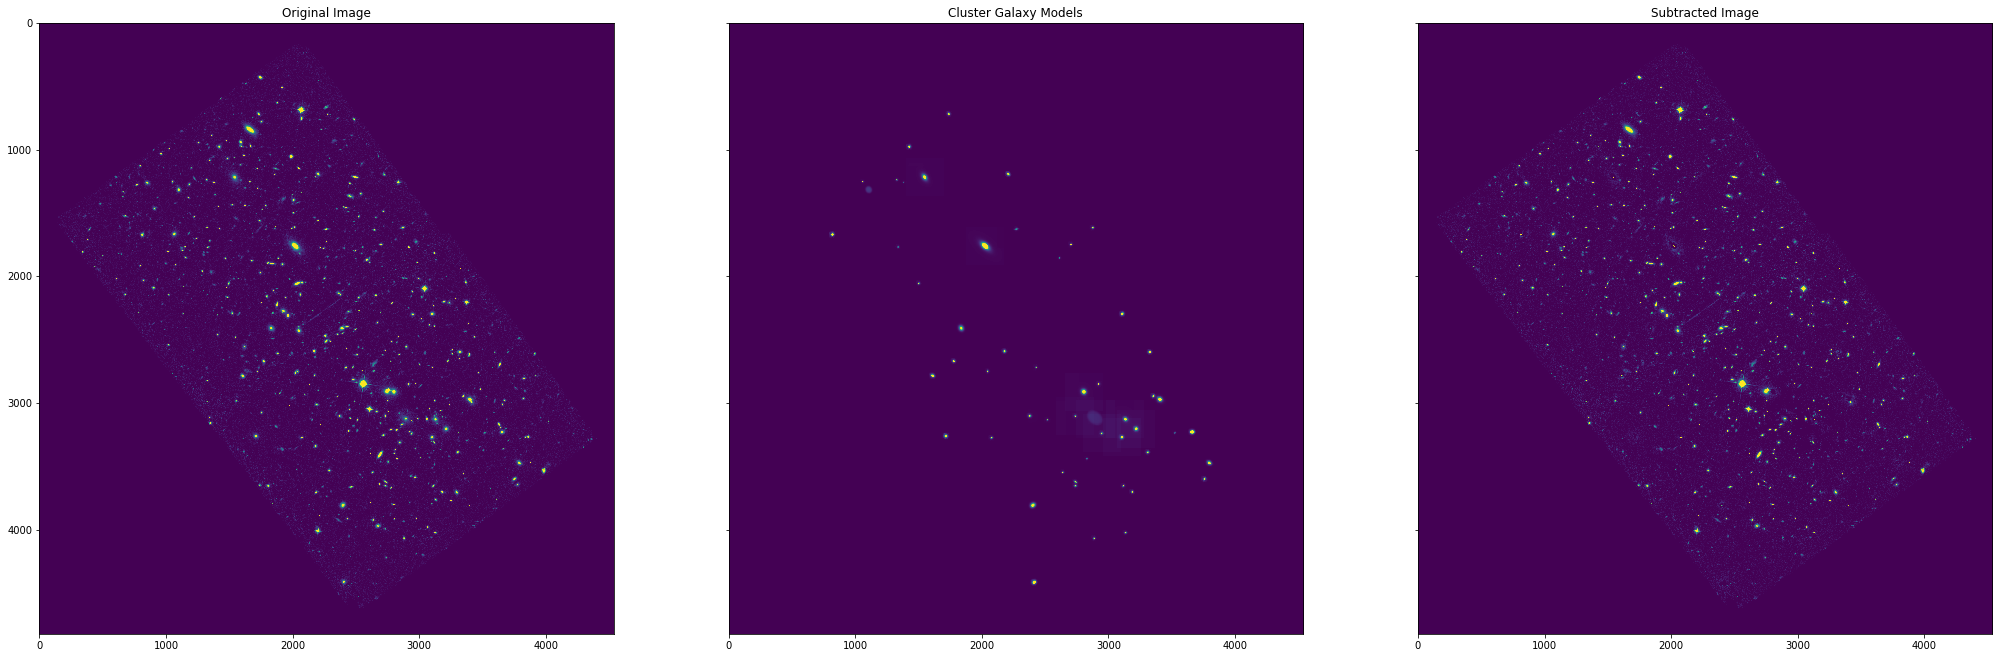

In [14]:
#plotting first 4 filters only b/c same size

emptyfields = {}
for filter in filters[0:1]:
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    for COUNT,fn in enumerate(bestoutputs): #coudl enumerate filters, if get 10 arrays for bestoutputs[count]
        #print('test:',filter)
        try:
            image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/{}'.format(filter,fn))
            imagefile = pyfits.open(image)
            fitsec = imagefile[2].header['FITSECT']
            x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
            x_upper = int(fitsec.split(",")[0].split(":")[1])
            y_lower = int(fitsec.split(",")[1].split(":")[0])-1
            y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
            #print(COUNT,x_lower,x_upper,y_lower,y_upper,'FOR',image[30::],np.shape(imagefile[2].data))
            #print('mytest:',np.shape(imagefile[2].data))
            data = imagefile[2].data
            #print('for lsast test',np.shape(emptyfields[filter][x_lower:x_upper,y_lower:y_upper]),np.shape(emptyfields[filter]))
            emptyfields[filter][y_lower:y_upper,x_lower:x_upper]+=imagefile[2].data #note x,y order flip
            #print('SECOND',np.shape(emptyfields[filter][x_lower:x_upper,y_lower:y_upper]),np.shape(original_image_data))
            #print('COUNT:',COUNT)
        except urllib.error.URLError:
            print('missing',filter,fn)
        except ValueError as err:
            print('The Valuerror here is :',err)
            #print('pix sector less than 4 digits')
    background = original_image_data - emptyfields[filter]
    #plots one for each
    f, (ax1,ax2,ax3) = mpl.subplots(1,3,sharey=True,figsize=(35,35))
    ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
    ax1.title.set_text('Original Image')
    ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
    ax2.title.set_text('Cluster Galaxy Models')
    ax3.imshow(background,vmin=0,vmax=0.2)#residuals
    ax3.title.set_text('Subtracted Image')

(2500, 3500)

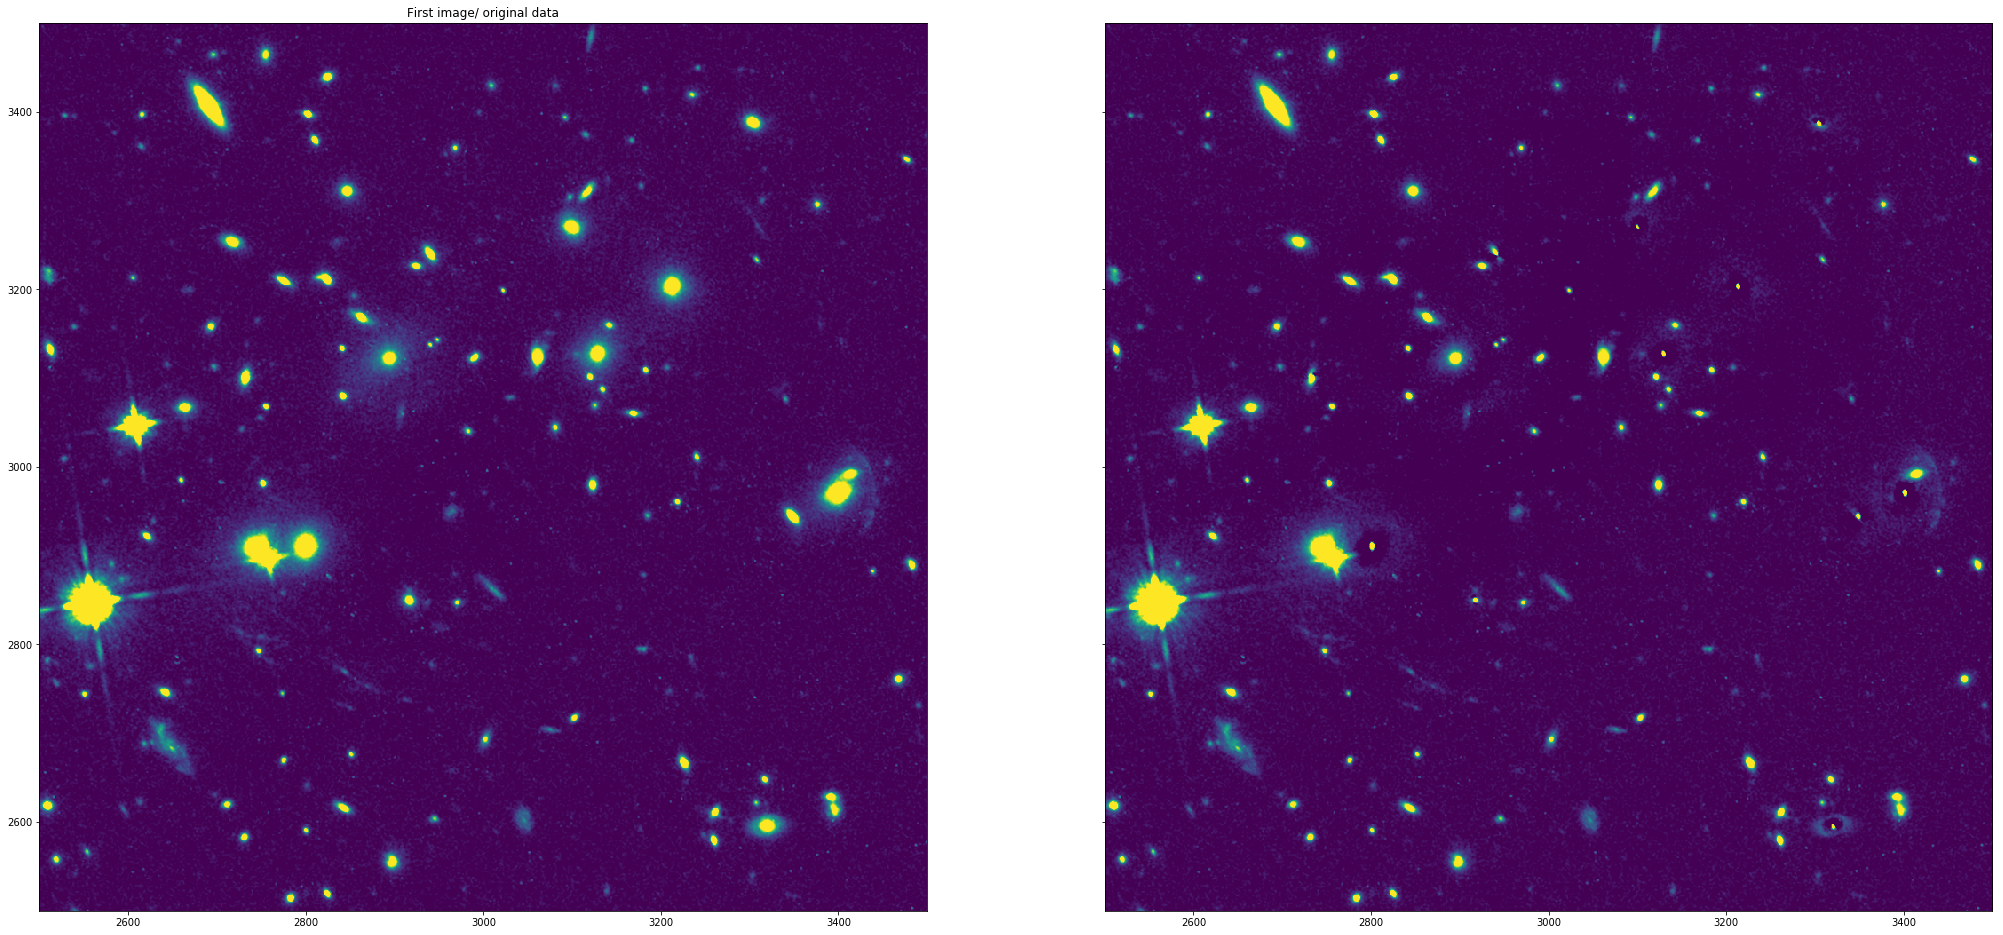

In [18]:
    f, (ax1,ax2) = mpl.subplots(1,2,sharey=True,figsize=(35,35))
    ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
    ax1.title.set_text('First image/ original data')
    #ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
    #ax2.imshow(np.flip(emptyfields[filter],axis=1),vmin=0,vmax=0.2)
    #ax2.title.set_text('Second image/ FitModels')
    ax2.imshow(background,vmin=0,vmax=0.2)#residuals
    ax1.set_ylim(2500,3500)
    ax2.set_ylim(2500,3500)
    ax1.set_xlim(2500,3500)
    ax2.set_xlim(2500,3500)

In [4]:
#works for outputs in ascending order,modifying above

#plotting first 4 filters only b/c same size
'''
emptyfields = {}
for filter in filters[0:4]:
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))  
        print(np.shape(detect_nums))
        for count in detect_nums:
            try:
                image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/Outputs/output{}.fits'.format(filter,count))
                
                imagefile = pyfits.open(image)
                
                #need to sum locations to one field but maintain shape of model, cant use only xc,yc
                
                
                ##xc = int(imagefile[2].header['2_XC'][1:-6])
                #print(type(xc),xc[1:-6])
                ##print(xc,type(xc))
                ##yc = int(imagefile[2].header['2_YC'][1:-6])
                fitsec = imagefile[2].header['FITSECT']
            
                x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
                x_upper = int(fitsec.split(",")[0].split(":")[1])
                y_lower = int(fitsec.split(",")[1].split(":")[0])-1
                y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
                print(x_lower,x_upper,y_lower,y_upper)
                data = imagefile[2].data
                emptyfield[x_lower:x_upper,y_lower:y_upper]+=imagefile[2].data
                #emptyfield[int(imagefile[2].header['FITSECT'][1:-1])]=1
#                 emptyfield.astype('int')
#                 data.astype('int')
#                 print(np.shape(data),np.shape(emptyfield))
#                 models = np.sum(emptyfield,data)
#                 ##print(xc,yc,np.shape(data),np.shape(emptyfield),emptyfield[xc,yc])
                ##emptyfield[xc,yc]=1
                ##print('new empty field',emptyfield[xc,yc])
                #print(emptyfield)
            except urllib.error.URLError:
                print('missing',filter,count)
            except ValueError as err:
                print(err)
                print('pix sector less than 4 digits')
            #image = get_pkg_data_filename('/data1/rowland/{}/Outputs/output{}.fits'.format(filter,count))
            image_1 = pyfits.getdata(image,ext =1) #original
            image_2 = pyfits.getdata(image, ext=2) #model
        #print(imagefile[2].header['2_XC'],filter,count)
        #break
            #mpl.imshow(emptyfield,vmin=0,vmax=1)
        #print(imagefile[2]['2_XC'])
        #print(np.shape(image_2),(pyfits.open(image))[2]['2_XC'])
#         sky_coords = 
        #models = np.sum(emptyfield,image_2)
        #print(np.shape(models))
        
        f, (ax1,ax2) = mpl.subplots(1,2,sharey=True,figsize=(35,35))
        ax1.imshow(image_1,vmin=0,vmax=1) #change to elgordo
        ax1.title.set_text('First image/ original data')
        ax2.imshow(emptyfield,vmin=0,vmax=0.2)
        ax2.title.set_text('Second image/ FitModels')
        ''' 

'\nemptyfields = {}\nfor filter in filters[0:4]:\n    originalimage = get_pkg_data_filename(\'/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits\'.format(filter))\n    original_image_data = pyfits.getdata(originalimage)\n    emptyfields[filter] = np.zeros_like(original_image_data)\n    \n    if filter == \'F850LP\':\n        tfilter = filter[:-2]\n        detect_nums = np.arange(0,len(masterdata[~masterdata[\'X_IMAGE_{}\'.format(tfilter)].mask]))\n    else:\n        tfilter = filter[:-1]\n        detect_nums = np.arange(0,len(masterdata[~masterdata[\'X_IMAGE_{}\'.format(tfilter)].mask]))  \n        print(np.shape(detect_nums))\n        for count in detect_nums:\n            try:\n                image = get_pkg_data_filename(\'/run/media/rowland/PURPLEDRIVE/{}/Outputs/output{}.fits\'.format(filter,count))\n                \n                imagefile = pyfits.open(image)\n                \n                #need to sum locations to one field but maintain shape of model, cant use only xc,yc\n

In [30]:
#emptyfields

{'F105W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F125W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F140W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F160W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
   

# SUBTRACTING SKY FROM GALAXY MODELS

In [30]:
filters = ['F606W','F435W'] #["F814W"]#,"F850LP"] #["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W"] #,"F814W","F850LP"] to save memory run later

emptyfields = {}
background = {}
backgroundWOstars ={}
for idx,filter in enumerate(filters):
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    starmaskfile = get_pkg_data_filename('/data1/rowland/GALSnSTARSmasks/starmask_{}'.format(filter))
    starmask = pyfits.open(starmaskfile)[0].data
#dont need below b/c fixed starmask for F435
#     if not filter == "F435W": 
#         starmaskfile = get_pkg_data_filename('/data1/rowland/GALSnSTARSmasks/starmask_{}'.format(filter))
#         starmask = pyfits.open(starmaskfile)[0].data
#     else:
#         starmaskfile = 'picked F435W'
#         starmask = 0
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    print(idx)
    for COUNT,fn in enumerate(allbestoutputs[filter]):
        try:
            image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/{}'.format(filter,fn))
            imagefile = pyfits.open(image)
            fitsec = imagefile[2].header['FITSECT']
            x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
            x_upper = int(fitsec.split(",")[0].split(":")[1])
            y_lower = int(fitsec.split(",")[1].split(":")[0])-1
            y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
            skyinfo = imagefile[2].header['2_SKY']
            sky = float(skyinfo.split("+")[0])
            #rint(np.shape(imagefile[2].data),sky)
            data = imagefile[2].data - sky #so that sky in uniform (0) in final image
            emptyfields[filter][y_lower:y_upper,x_lower:x_upper]+=data #note x,y order flip
        except urllib.error.URLError:
            print('missing',filter,fn)
        except ValueError as err:
            print('The Valuerror here is :',err)
    #reak
    print(originalimage, np.shape(emptyfields[filter]),filter,starmaskfile)
    background[filter] = original_image_data - emptyfields[filter]
    backgroundWOstars[filter] = original_image_data - emptyfields[filter] - starmask
    #below files already written
    
    #pyfits.writeto('/data1/rowland/FINALimages/modelsWOsky_subtubtracted_elgordo{}.fits'.format(filter),background[filter],overwrite=True)
    #pyfits.writeto('/data1/rowland/FINALimages/modelsWOsky_elgordo{}'.format(filter),emptyfields[filter],overwrite=True)
    pyfits.writeto('/data1/rowland/FINALimages/modelsWOskyNstar_subtubtracted_elgordo{}.fits'.format(filter),backgroundWOstars[filter],overwrite=True)


0
/run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits (8473, 8201) F814W /data1/rowland/GALSnSTARSmasks/starmask_F814W


In [27]:

#             #testing b/c whyyyyyyyy x,y order above messed up for some filters
# testarr = np.array(range(10))
# testarr2 = np.arange(10,20,1)
# testarr3 = testarr - testarr2
# print(testarr,testarr2,testarr3)

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19] [-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]


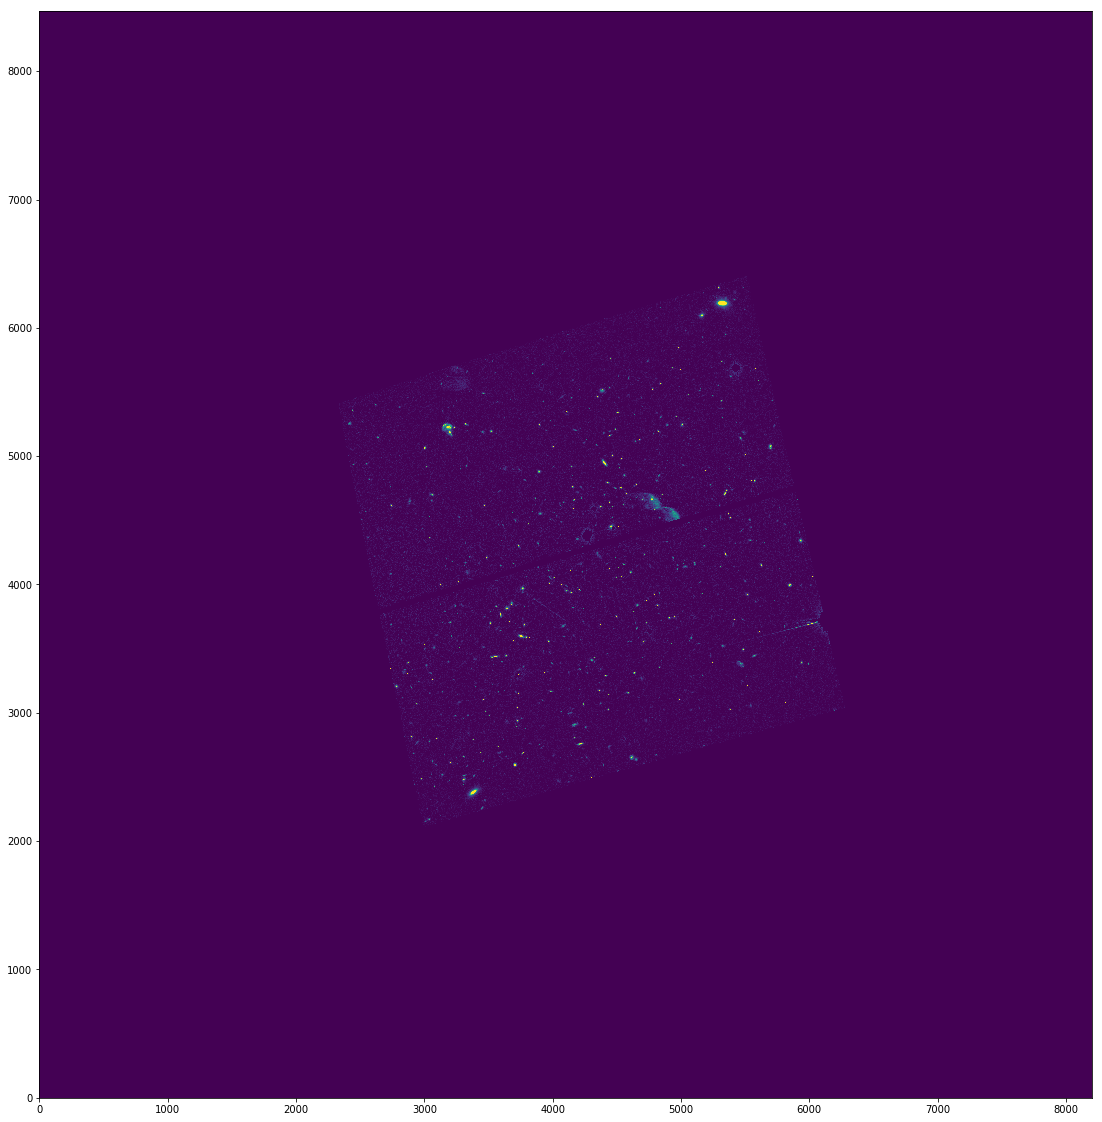

In [33]:
filter='F814W'
mpl.figure(figsize=(20,20))
mpl.imshow(backgroundWOstars[filter],vmin=0,vmax=.2)
#mpl.imshow(starmask,vmin=0,vmax=.2)

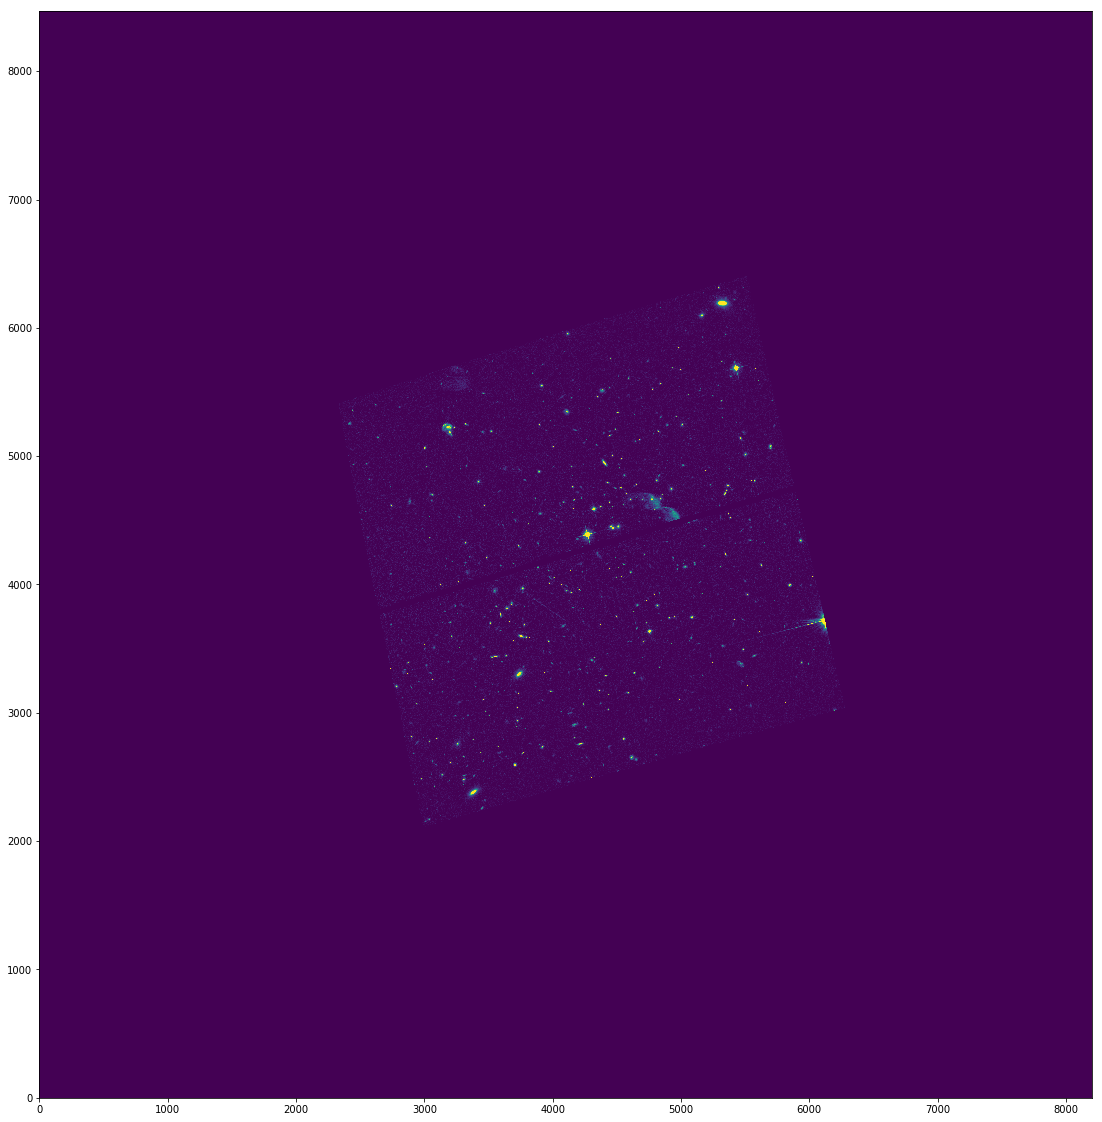

In [32]:

originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
original_image_data = pyfits.getdata(originalimage)
mpl.figure(figsize=(20,20))
mpl.imshow(original_image_data,vmin=0,vmax=.2)

# TEST CELLS BELOW

In [21]:
#doing in a cycle -- THIS WORKS SAVED ORIGINAL MODEL IMAGES HERE W/O SKY SUBTRACTION



filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

emptyfields = {}
background = {}
for idx,filter in enumerate(filters):
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    print(idx)
    for COUNT,fn in enumerate(allbestoutputs[filter]):
        try:
            image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/{}'.format(filter,fn))
            imagefile = pyfits.open(image)
            fitsec = imagefile[2].header['FITSECT']
            x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
            x_upper = int(fitsec.split(",")[0].split(":")[1])
            y_lower = int(fitsec.split(",")[1].split(":")[0])-1
            y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
            data = imagefile[2].data
            emptyfields[filter][y_lower:y_upper,x_lower:x_upper]+=imagefile[2].data #note x,y order flip
            #emptyfields[filter][x_lower:x_upper,y_lower:y_upper]+=imagefile[2].data #original x,y order
            #testing b/c whyyyyyyyy x,y order above messed up for some filters
        except urllib.error.URLError:
            print('missing',filter,fn)
        except ValueError as err:
            print('The Valuerror here is :',err)
    #break
    print(originalimage, np.shape(emptyfields[filter]),filter)
    background[filter] = original_image_data - emptyfields[filter]
    #below files already written
    pyfits.writeto('/data1/rowland/subtracted_elgordo{}.fits'.format(filter),background[filter],overwrite=True)
    pyfits.writeto('/data1/rowland/models_elgordo{}'.format(filter),emptyfields[filter],overwrite=True)

    
    #saved to plot elsewhere b/c this notebook gets too big-crashes


    #     #plots one for each
#     f, (ax1,ax2,ax3) = mpl.subplots(1,3,sharey=True,figsize=(35,35))
#     ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
#     ax1.title.set_text('Original Image')
#     ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
#     ax2.title.set_text('Cluster Galaxy Models')
#     ax3.imshow(background,vmin=0,vmax=0.2)#residuals
#     ax3.title.set_text('Subtracted Image')

0
/run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits (4824, 4538) F105W
1
/run/media/rowland/PURPLEDRIVE/elgordo_F125W.fits (4824, 4538) F125W
2
/run/media/rowland/PURPLEDRIVE/elgordo_F140W.fits (4824, 4538) F140W
3
/run/media/rowland/PURPLEDRIVE/elgordo_F160W.fits (4824, 4538) F160W
4
/run/media/rowland/PURPLEDRIVE/elgordo_F435W.fits (4256, 4397) F435W
5
/run/media/rowland/PURPLEDRIVE/elgordo_F606W.fits (8473, 8201) F606W
6
/run/media/rowland/PURPLEDRIVE/elgordo_F625W.fits (8473, 8201) F625W
7
/run/media/rowland/PURPLEDRIVE/elgordo_F775W.fits (8473, 8201) F775W
8
/run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits (8473, 8201) F814W
9
/run/media/rowland/PURPLEDRIVE/elgordo_F850LP.fits (8473, 8201) F850LP


In [ ]:
#toomuch it crashes


# for idx,filter in enumerate(filters):
#     originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
#     original_image_data = pyfits.getdata(originalimage)
#     f, (ax1,ax2,ax3) = mpl.subplots(1,3,sharey=True,figsize=(35,35))
#     ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
#     ax1.title.set_text('Original Image')
#     ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
#     ax2.title.set_text('Cluster Galaxy Models')
#     ax3.imshow(background[filter],vmin=0,vmax=0.2)#residuals
#     ax3.title.set_text('Subtracted Image')

In [ ]:
# for filter in filters:
#     pyfits.writeto('models_{}'.format(filter),emptyfields[filter])

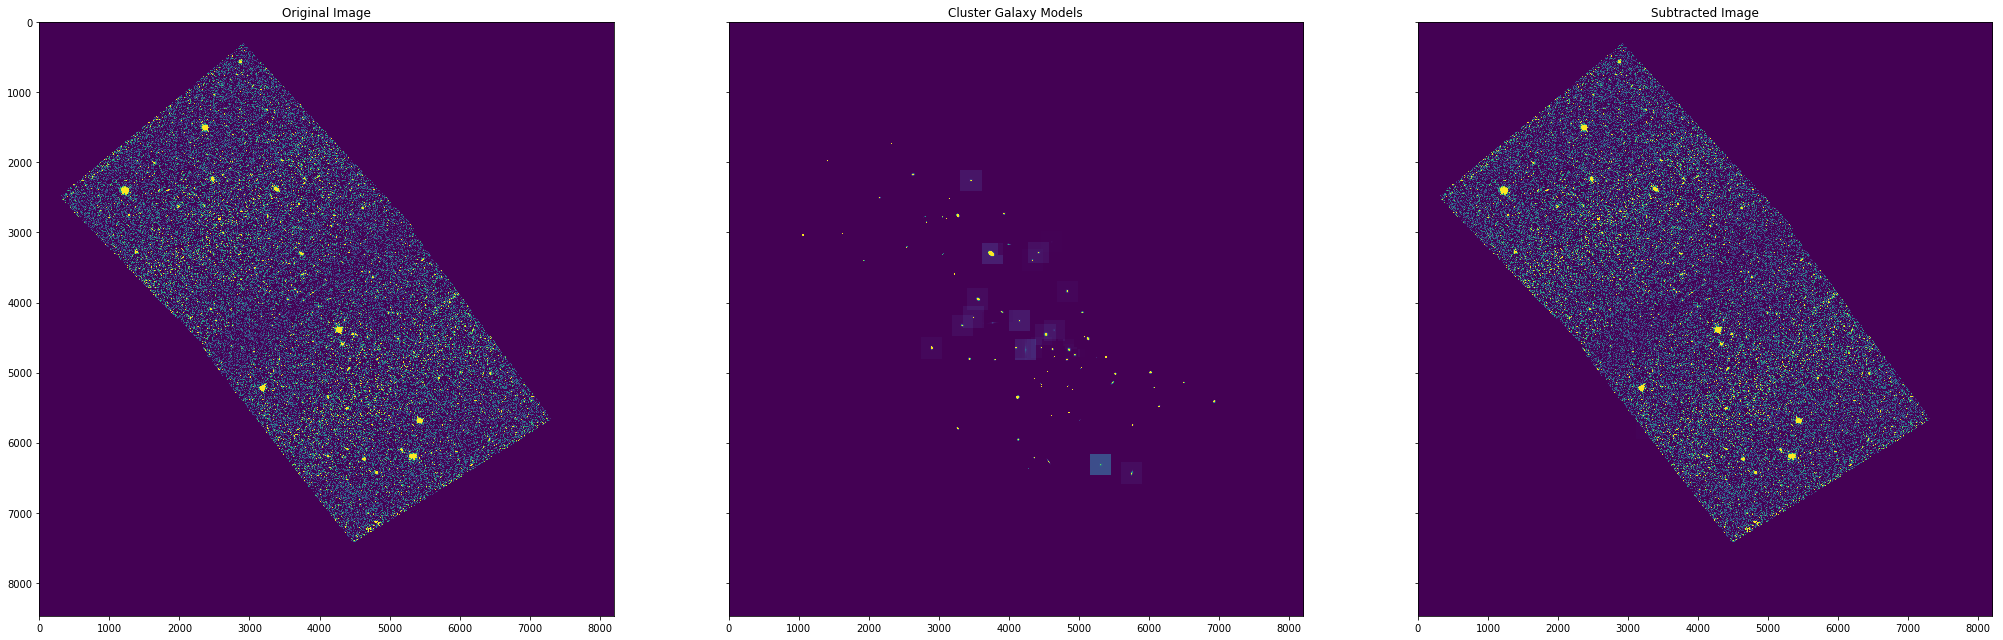

In [9]:
filter = 'F625W'
originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
original_image_data = pyfits.getdata(originalimage)

f, (ax1,ax2,ax3) = mpl.subplots(1,3,sharey=True,figsize=(35,35))
ax1.imshow(original_image_data,vmin=0,vmax=0.01) #elgordo
ax1.title.set_text('Original Image')
ax2.imshow(emptyfields[filter],vmin=0,vmax=0.002)#subtracted galaxies
ax2.title.set_text('Cluster Galaxy Models')
ax3.imshow(background[filter],vmin=0,vmax=0.01)#residuals
ax3.title.set_text('Subtracted Image')

In [19]:
# mpl.figure(figsize=(20,20))
# mpl.imshow(emptyfields[filter],vmin=0,vmax=0.0002)#subtracted galaxies
# mpl.title('Cluster Galaxy Models_ {}'.format(filter))
# mpl.ylim(2000,3000)
# mpl.xlim(2500,3500)

In [20]:

# mpl.figure(figsize=(20,20))
# mpl.imshow(original_image_data,vmin=0,vmax=0.01) #elgordo
# mpl.title('Original Image {}'.format(filter))
# mpl.ylim(2000,3000)
# mpl.xlim(2500,3500)

# getting example plots for presentation


In [3]:

def select_object_segmap(segmap,index):
    Regions = np.zeros_like(segmap)
    if index not in segmap:
        raise ValueError('index not in segmentation map')
    Regions[segmap==index]=index
    return Regions

In [7]:
def usingfilter(filtername):
    #filter = filtername
    detected_objs_file_table = ascii.read('/run/media/rowland/PURPLEDRIVE/testPSF_{}.cat'.format(filtername))
    image_file = pyfits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filtername))
    segmap_file = pyfits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(filtername))
    data_perfilter = detected_objs_file_table, image_file, segmap_file, filtername
    return(data_perfilter)

In [8]:
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","F105W_galfit_test_folder"]
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}

#ONLY CHANGES NEEDED: FILTER HERE, ADJUST B1&B2 VALUES & MAG CUT AS NEEDED
############################################################################
data = usingfilter(filters[0])
############################################################################
print('Currently using this filter:',data[3])

Currently using this filter: F105W


In [9]:
detected_objs_file = data[0]
image_file = data[1]
segmap_file = data[2]
filtername = data[3]


ACT-CL,SMH,RAJ2000,DEJ2000,imag,z,e_z,rcc,MSF,Simbad,recno,NUMBER_F105,MAG_AUTO_F105,MAGERR_AUTO_F105,KRON_RADIUS_F105,ISOAREA_IMAGE_F105,XPEAK_IMAGE_F105,YPEAK_IMAGE_F105,X_IMAGE_F105,Y_IMAGE_F105,ALPHA_J2000_F105,DELTA_J2000_F105,A_IMAGE_F105,THETA_IMAGE_F105,MU_MAX_F105,ELLIPTICITY_F105,CLASS_STAR_F105,FLUX_RADIUS_F105,Separation_1,NUMBER_F125,MAG_AUTO_F125,MAGERR_AUTO_F125,KRON_RADIUS_F125,ISOAREA_IMAGE_F125,XPEAK_IMAGE_F125,YPEAK_IMAGE_F125,X_IMAGE_F125,Y_IMAGE_F125,ALPHA_J2000_F125,DELTA_J2000_F125,A_IMAGE_F125,THETA_IMAGE_F125,MU_MAX_F125,ELLIPTICITY_F125,CLASS_STAR_F125,FLUX_RADIUS_F125,Separation_1a,NUMBER_F140,MAG_AUTO_F140,MAGERR_AUTO_F140,KRON_RADIUS_F140,ISOAREA_IMAGE_F140,XPEAK_IMAGE_F140,YPEAK_IMAGE_F140,X_IMAGE_F140,Y_IMAGE_F140,ALPHA_J2000_F140,DELTA_J2000_F140,A_IMAGE_F140,THETA_IMAGE_F140,MU_MAX_F140,ELLIPTICITY_F140,CLASS_STAR_F140,FLUX_RADIUS_F140,Separation_1b,NUMBER_F160,MAG_AUTO_F160,MAGERR_AUTO_F160,KRON_RADIUS_F160,ISOAREA_IMAGE_F160,XPEAK_IMAGE_F160,YPEAK_IMAGE_F160,X_IMAGE_F160,Y_IMAGE_F160,ALPHA_J2000_F160,DELTA_J2000_F160,A_IMAGE_F160,THETA_IMAGE_F160,MU_MAX_F160,ELLIPTICITY_F160,CLASS_STAR_F160,FLUX_RADIUS_F160,Separation_1c,NUMBER_F435,MAG_AUTO_F435,MAGERR_AUTO_F435,KRON_RADIUS_F435,ISOAREA_IMAGE_F435,XPEAK_IMAGE_F435,YPEAK_IMAGE_F435,X_IMAGE_F435,Y_IMAGE_F435,ALPHA_J2000_F435,DELTA_J2000_F435,A_IMAGE_F435,THETA_IMAGE_F435,MU_MAX_F435,ELLIPTICITY_F435,CLASS_STAR_F435,FLUX_RADIUS_F435,Separation_1d,NUMBER_F606,MAG_AUTO_F606,MAGERR_AUTO_F606,KRON_RADIUS_F606,ISOAREA_IMAGE_F606,XPEAK_IMAGE_F606,YPEAK_IMAGE_F606,X_IMAGE_F606,Y_IMAGE_F606,ALPHA_J2000_F606,DELTA_J2000_F606,A_IMAGE_F606,THETA_IMAGE_F606,MU_MAX_F606,ELLIPTICITY_F606,CLASS_STAR_F606,FLUX_RADIUS_F606,Separation_1e,NUMBER_F625,MAG_AUTO_F625,MAGERR_AUTO_F625,KRON_RADIUS_F625,ISOAREA_IMAGE_F625,XPEAK_IMAGE_F625,YPEAK_IMAGE_F625,X_IMAGE_F625,Y_IMAGE_F625,ALPHA_J2000_F625,DELTA_J2000_F625,A_IMAGE_F625,THETA_IMAGE_F625,MU_MAX_F625,ELLIPTICITY_F625,CLASS_STAR_F625,FLUX_RADIUS_F625,Separation_1f,NUMBER_F775,MAG_AUTO_F775,MAGERR_AUTO_F775,KRON_RADIUS_F775,ISOAREA_IMAGE_F775,XPEAK_IMAGE_F775,YPEAK_IMAGE_F775,X_IMAGE_F775,Y_IMAGE_F775,ALPHA_J2000_F775,DELTA_J2000_F775,A_IMAGE_F775,THETA_IMAGE_F775,MU_MAX_F775,ELLIPTICITY_F775,CLASS_STAR_F775,FLUX_RADIUS_F775,Separation_1g,NUMBER_F814,MAG_AUTO_F814,MAGERR_AUTO_F814,KRON_RADIUS_F814,ISOAREA_IMAGE_F814,XPEAK_IMAGE_F814,YPEAK_IMAGE_F814,X_IMAGE_F814,Y_IMAGE_F814,ALPHA_J2000_F814,DELTA_J2000_F814,A_IMAGE_F814,THETA_IMAGE_F814,MU_MAX_F814,ELLIPTICITY_F814,CLASS_STAR_F814,FLUX_RADIUS_F814,Separation_1h,NUMBER_F850,MAG_AUTO_F850,MAGERR_AUTO_F850,KRON_RADIUS_F850,ISOAREA_IMAGE_F850,XPEAK_IMAGE_F850,YPEAK_IMAGE_F850,X_IMAGE_F850,Y_IMAGE_F850,ALPHA_J2000_F850,DELTA_J2000_F850,A_IMAGE_F850,THETA_IMAGE_F850,MU_MAX_F850,ELLIPTICITY_F850,CLASS_STAR_F850,FLUX_RADIUS_F850,Separation
str10,str18,float64,float64,float64,float64,float64,float64,str16,str6,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float6

In [14]:

segmap = segmap_file[0].data+0 #PARAMETER
collected_regions = []

for detection in masterdata: 
    xc = detection["X_IMAGE_F105"] #in pix #PARAMETER
    yc = detection["Y_IMAGE_F105"] #in pix #PARAMETER
    pixscale = 0.06 #PARAMETER
    index = detection['NUMBER_F105']
    print(type(index))
    #radius=0.5 ##DEFAULT value for reference #PARAMETER
    if type(index) == type(detection['NUMBER_F105'][0]:
        
        each_region = select_object_segmap(segmap,index) #indexing so have matching value so subtracting =0
        collected_regions.append(each_region)
    else:
        continue
collected_regions = np.array(collected_regions)
print('collected_regions: type-',type(collected_regions), 'shape-',collected_regions.shape)    
final_regions = np.sum(collected_regions, axis=0) #COLLECTING ALL OUTPUTS TO ONE MASK
print('shape of final regions:',final_regions.shape)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int6

In [ ]:
#subtracting
mask_file = segmap - final_regions #so the galaxies of the cluster have value=0

#setting values to be binary, all none cluster galaxy pixels are =1 (so galfit will ignore)
mask_file[np.where(mask_file > 0)]=1
#setting regions outside of observation to =1
mask_file[image_data==0]=1

In [ ]:
fig, axis = mpl.subplots(1,4,figsize=(18,8),sharex=True,sharey=True)
axis[0].imshow(image_data,vmin = -0.01,vmax = 0.1)
axis[0].set_title('hubble data')
axis[1].imshow(segmap,vmin=0,vmax=1)
axis[1].set_title('segmap')
axis[2].imshow(final_regions,vmin=0, vmax=1)
axis[2].set_title('detected regions')
axis[3].imshow(mask_file,vmin=0,vmax=1)
axis[3].set_title('mask')